# Fire statistics
The home office publishes [fire statistics](https://www.gov.uk/government/collections/fire-statistics-great-britain) in England. Here, I'm looking at hourly fires by year in England.

In [27]:
import pandas as pd
from pandas.api.types import CategoricalDtype

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext lab_black

In [2]:
data = pd.read_excel('./data/fire-statistics-data-tables-fire0801-300921.xlsx',sheet_name='Data_totalfires')

In [3]:
data[:24]

,FINANCIAL_YEAR,HOUR_BANDS,Total fires
0,2010/11,00-01,8453
1,2010/11,01-02,7003
2,2010/11,02-03,5691
3,2010/11,03-04,4675
4,2010/11,04-05,3902
5,2010/11,05-06,3077
6,2010/11,06-07,2728
7,2010/11,07-08,3234
8,2010/11,08-09,4119
9,2010/11,09-10,4666


In [88]:
cat_type = CategoricalDtype(
    categories=[
        "06-07",
        "07-08",
        "08-09",
        "09-10",
        "10-11",
        "11-12",
        "12-13",
        "13-14",
        "14-15",
        "15-16",
        "16-17",
        "17-18",
        "18-19",
        "19-20",
        "20-21",
        "21-22",
        "22-23",
        "23-00",
        "00-01",
        "01-02",
        "02-03",
        "03-04",
        "04-05",
        "05-06",
    ],
    ordered=True,
)

data.HOUR_BANDS = data.HOUR_BANDS.astype(cat_type)

In [7]:
px.line(data,x='HOUR_BANDS',y='Total fires',color='FINANCIAL_YEAR',markers=True)

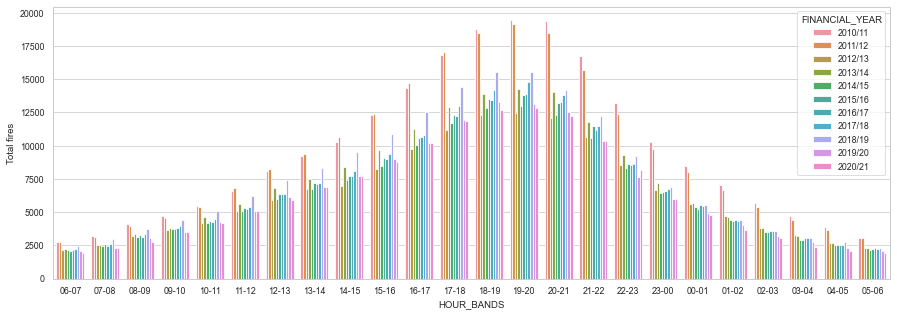

In [9]:
sns.set(rc={"figure.figsize": (15, 5)})
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
ax = sns.barplot(
    y="Total fires",
    x="HOUR_BANDS",
    hue="FINANCIAL_YEAR",
    data=data,
    #palette=palette,
)
plt.show()

In [10]:
average = data.groupby('HOUR_BANDS')[['Total fires']].mean().reset_index()
average['FINANCIAL_YEAR'] = 'average'

In [11]:
pd.concat([data.set_index('FINANCIAL_YEAR'),average.set_index('FINANCIAL_YEAR')]).reset_index()

,FINANCIAL_YEAR,HOUR_BANDS,Total fires
0,2010/11,00-01,8453.000000
1,2010/11,01-02,7003.000000
2,2010/11,02-03,5691.000000
3,2010/11,03-04,4675.000000
4,2010/11,04-05,3902.000000
...,...,...,...
283,average,01-02,4755.363636
284,average,02-03,3878.181818
285,average,03-04,3237.818182
286,average,04-05,2736.090909


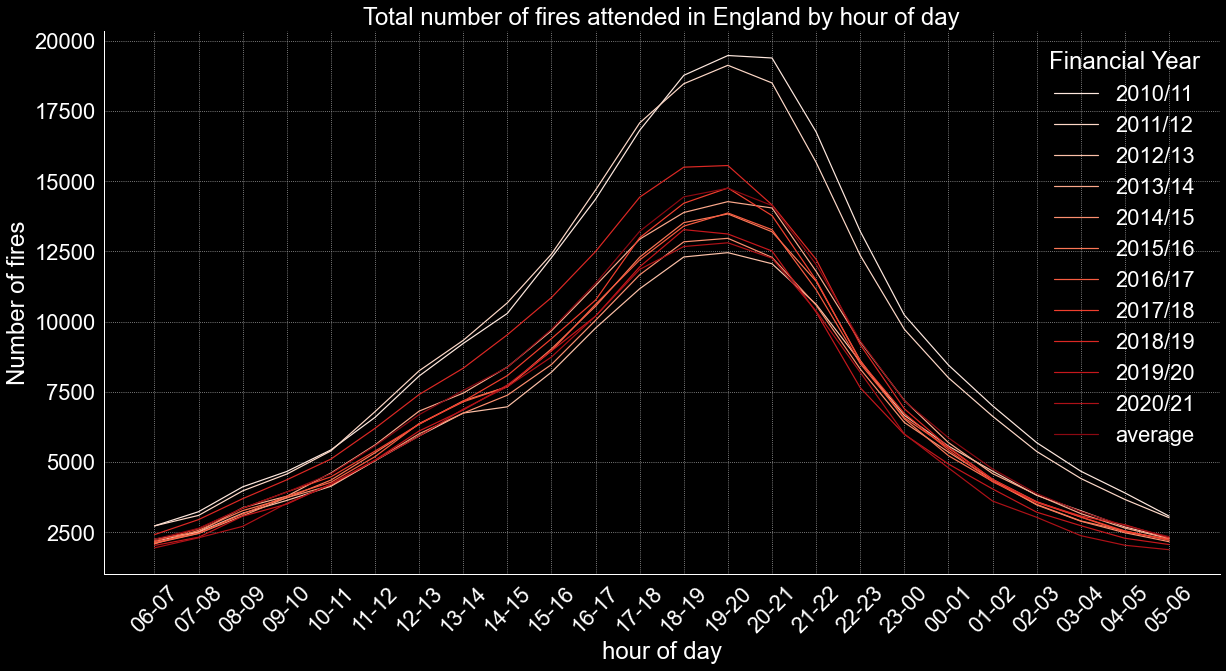

In [46]:
sns.set(rc={"figure.figsize": (20, 10)})
# sns.set_style("dark")
sns.set(
    rc={
        "axes.facecolor": "black",
        "figure.facecolor": "black",
        "grid.linestyle": ":",
        "grid.color": "#b0b0b0",
        "axes.labelcolor": "white",
        "ytick.color": "white",
        "xtick.color": "white",
        "text.color": "white",
        "axes.spines.top": False,
        "axes.spines.right": False,
    }
)  #'axes.grid': False

sns.set_context("paper", font_scale=2.5)
ax = sns.lineplot(
    y="Total fires",
    x="HOUR_BANDS",
    hue="FINANCIAL_YEAR",
    data=pd.concat(
        [data.set_index("FINANCIAL_YEAR"), average.set_index("FINANCIAL_YEAR")]
    ).reset_index(),
    palette="Reds",
)
plt.xticks(rotation=45)
plt.title("Total number of fires attended in England by hour of day")
plt.legend(title="Financial Year", loc="upper right", frameon=False)
ax.set_ylabel("Number of fires")
ax.set_xlabel("hour of day")
plt.show()

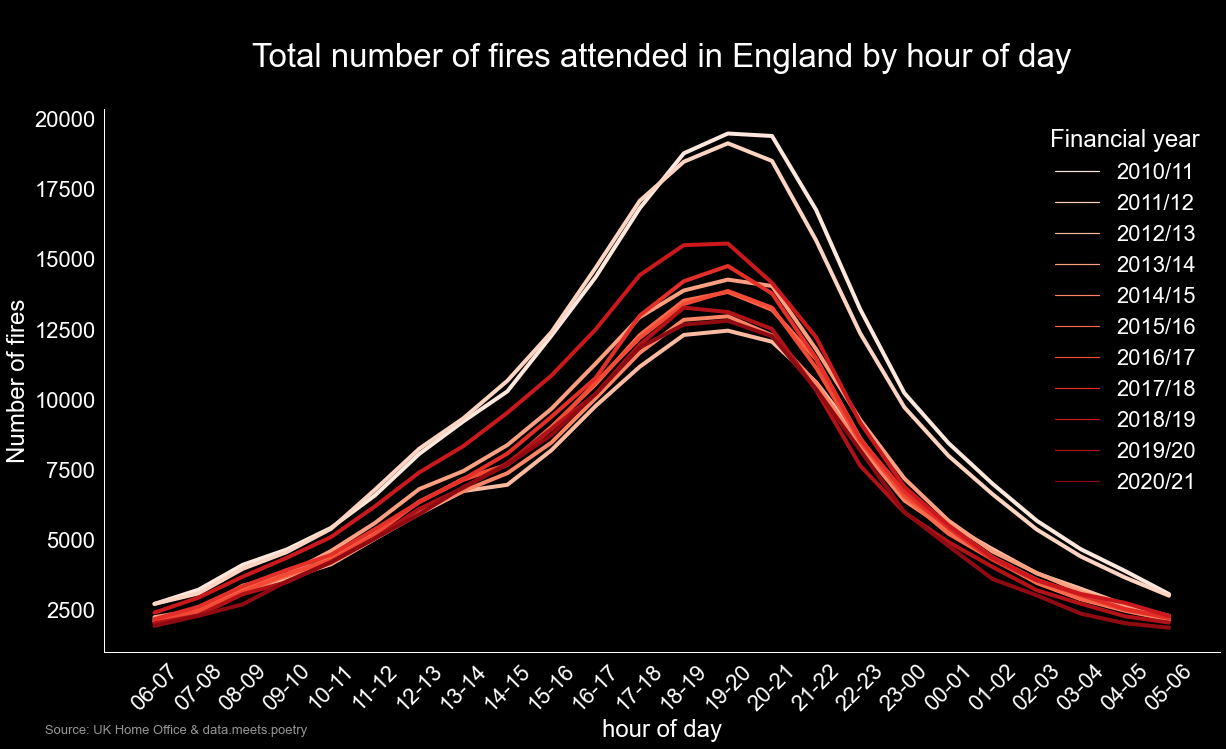

In [87]:
sns.set(rc={"figure.figsize": (20, 10)})

sns.set(
    rc={
        "axes.facecolor": "black",
        "figure.facecolor": "black",
        "grid.linestyle": ":",
        "grid.color": "#b0b0b0",
        "axes.labelcolor": "white",
        "ytick.color": "white",
        "xtick.color": "white",
        "text.color": "white",
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.grid": False,
    }
)

sns.set_context("paper", font_scale=2.5)
ax = sns.lineplot(
    y="Total fires",
    x="HOUR_BANDS",
    hue="FINANCIAL_YEAR",
    data=data,
    palette="Reds",
    lw=4,
)
plt.xticks(rotation=45)
plt.title(
    "\nTotal number of fires attended in England by hour of day\n",
    fontdict={"fontsize": 33},
)
plt.legend(
    title="Financial year",
    loc="upper right",
    frameon=False,
)
ax.set_ylabel("Number of fires")
ax.set_xlabel("hour of day")

ax.text(
    x=0.5,
    y=-1900,
    s="Source: UK Home Office & data.meets.poetry",
    fontsize=13,
    fontname="Arial",
    color="#969696",
    ha="center",
)
plt.show()